In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np

## Wichtigste Übungsaufgaben:
* 5.3 
* 5.4
* 5.6
---
# Aufgabe 5.3
In einer Studie wurde untersucht, wie bei Mäusen die Aufnahme von Eisen (Fe3+) von der Dosis abhängt. Dazu wurden 54 Mäuse zufällig in 3 Gruppen zu je 18 Mäusen eingeteilt und jeweils mit Dosis hoch, mittel und tief gefüttert (hoch = 10.2 millimolar,
mittel=1.2 millimolar, tief=0.3 millimolar). Mittels radioaktiver Markierung wurde der Anteil des zurückgehaltenen Eisens in Prozent nach einer gewissen Zeit bestimmt.<br />
Die Daten sind auf Ilias in der Datei ironF3.dat abgelegt; Sie können sie einlesen mit dem Befehl<br />
`iron = pd.read_csv("*/ironF3.dat",sep=" ",index_col=False)`
<br />Für * muss der gesamte Pfad stehen, wo Sie ihre Datei abgespeichert haben.
### a) Erstellen Sie für jede der 3 Versuchsbedingungen einen Boxplot, am besten gerade nebeneinander. Wie unterscheiden sich die Daten der verschiedenen Versuchsbedingungen?

In [2]:
iron = pd.read_csv("files/sw05/ironF3.dat",sep=" ",index_col=False)

In [3]:
iron.head()

,high,medium,low
0,0.71,2.20,2.25
1,1.66,2.93,3.93
2,2.01,3.08,5.08
3,2.16,3.49,5.82
4,2.42,4.11,5.84


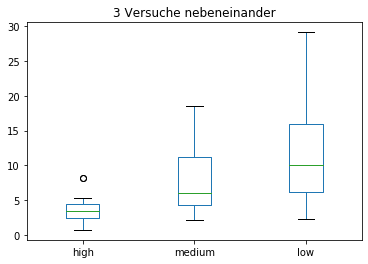

In [5]:
iron.plot(kind='box', title="3 Versuche nebeneinander")

### b) Transformieren Sie alle Werte mit dem Logarithmus und erstellen Sie wieder die 3 Boxplots wie bei Aufgabe a). Was hat sich durch die Transformation geändert?

Woher wir diesen Python-Code kennen sollen weiss ich nicht...

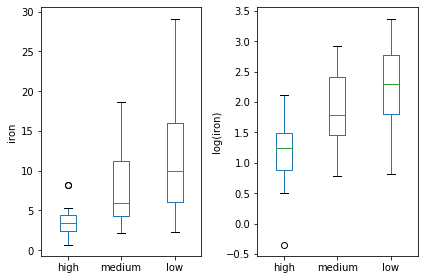

In [6]:
plt.subplot(1,2,1)
iron.plot(kind="box",ax=plt.gca())
plt.ylabel("iron")
plt.subplot(1,2,2)
np.log(iron).plot(kind="box",ax=plt.gca())
plt.ylabel("log(iron)")
plt.tight_layout()
plt.show()

### c) Erstellen Sie einen Normalplot der Daten bei mittlerer Dosis vor und nach dem Logarithmieren. Wann passt die Normalverteilung besser? Verwenden Sie die Python-Funktion
`st.probplot(...)`

((array([-1.77709673, -1.33087857, -1.05345661, -0.83977496, -0.6589352 ,
         -0.49749478, -0.34812942, -0.20618578, -0.06829777,  0.06829777,
          0.20618578,  0.34812942,  0.49749478,  0.6589352 ,  0.83977496,
          1.05345661,  1.33087857,  1.77709673]),
  array([0.78845736, 1.07500242, 1.1249296 , 1.24990174, 1.41342303,
         1.59938758, 1.64093658, 1.7119945 , 1.73695123, 1.83258146,
         1.98100147, 2.06686276, 2.18041746, 2.48156775, 2.74341734,
         2.76568998, 2.90690106, 2.9226238 ])),
 (0.6858048553747129, 1.901224840075921, 0.9844044280605407))

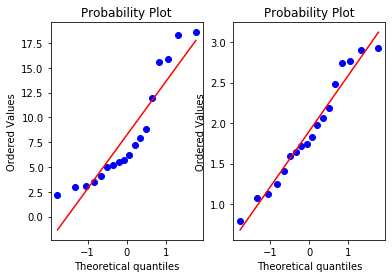

In [21]:
# Normale Werte
plt.subplot(1,2,1)
st.probplot(iron["medium"], plot=plt)

#log-Werte
plt.subplot(1,2,2)
st.probplot(np.log(iron["medium"]), plot=plt)

Die Normalverteiung passt bei den logarithmierten Werten besser.

### d) Unter der Annahme, dass die Daten bei mittlerer Dosis normalverteilt sind, schätzen Sie die Parameter $\mu$ und $\sigma^2$. Wie gross ist die Wahrscheinlichkeit, dass eine Maus mehr als 10% Eisen zurückhält.

In [27]:
EX = iron["medium"].mean()
print(EX)

8.203888888888889


Erwartungswert geschätzt = $\mu$ = 8.2039

In [33]:
VAR = iron["medium"].var()
print(VAR)

29.67401339869281


Varianz geschätzt = VAR = 29.674

In [35]:
STD = iron["medium"].std()
print(STD)

5.447385923421693


In [36]:
1 - st.norm.cdf(x=10, loc=EX, scale=STD)

0.37080583780045573

In [37]:
st.norm.ppf(q=0.10, loc=EX, scale=STD)

1.2227829306022002

### e) (Zusatzaufgabe) Unter der Annahme, dass die Daten bei mittlerer Dosis log-normalverteilt sind, schätzen Sie die Parameter $\mu$ und $\sigma^2$. Wie gross ist die Wahrscheinlichkeit, dass eine Maus mehr als 10% Eisen zurückhält.<br /><br /> Hinweis: Ist Y = log(X) normalverteilt ist, so heisst X log-normalverteilt.

gleich wie oben nur alles mit 
`np.log(iron["medium"])`

---
# Aufgabe 5.4
Ein Statistiker beobachtet, dass ein Angler innerhalb von 2 Stunden 15 Fische fängt. Er nimmt an, dass es sich um einen Poissonprozess handelt und überlegt sich:
### a) Mit welcher Wahrscheinlichkeit dauert es länger als 12 Minuten, bis der nächste Fisch anbeisst? Hinweis: Benützen Sie die Momentenmethode, um Parameter zu schätzen.

$$E(X) = \lambda$$
Wir ersetzen E(X) durch das empirische Gegenstück, den empirischen Mittelwert x_bar
$$ x_b = \lambda$$

In [38]:
120/15

8.0

### b) Mit welcher Wahrscheinlichkeit beissen innerhalb der nächsten 12 Minuten genau 2 Fische an?

### c) Ein Fischer hat die Wartezeiten zwischen zwei Fischfängen aufgeschrieben. Erstellen Sie einen QQ-Plot für die angegebenen Zeitdifferenzen. Tragen Sie dazu die empirischen Quantile der Messungen gegen die theoretischen Quantile der Exp(1)-Verteilung auf. Passt die Exponentialverteilung zu den Messdaten? Bestimmen Sie die Steigung der Regressionsgeraden im QQ-Plot. Was ist die Bedeutung von der Steigung der Regressionsgeraden in diesem QQ-Plot? Schätzen Sie aufgrund der Steigung den Parameter l der Exp(l)-Verteilung.

---
# Aufgabe 5.6
In dieser Aufgabe geht es um Parameterschätzung. Wir betrachten eine stetige Verteilung mit folgender Dichte:<br />
wobei a > 0 ein unbekannter Parameter ist. Wir wollen den Parameter a aus einer Stichprobe schätzen.
### a) Bestimmen Sie die Likelihood- und die Log-Likelihood-Funktion basierend auf n unabhängigen identisch verteilten Beobachtungen x1, . . . , xn einer Zufallsvariablen mit obiger Dichte.

### b) Bestimmen Sie den zugehörigen Maximum-Likelihood-Schätzer für a. Schreiben Sie zuerst die allgemeine Formel für n Beobachtungen hin und berechnen Sie den Schätzer dann für die folgende konkrete Stichprobe

### c) Bestimmen Sie denMomentenschätzer für a, wieder zuerst allgemein basierend auf n unabhängigen Beobachtungen x1, . . . , xn und dann für obige Stichprobe.

Für a "kleiner gleich" 1 ist der Erwartungswert gleich unendlich und der Momentenschätzer ist nicht definiert. Sie müssen für diese Teilaufgabe also annehmen, dass a > 1.

### d) Vergleichen Sie den Maximum-Likelihood und den Momentenschätzer für obige Stichprobe. Ist der Momentenschätzer hier sinnvoll?